# #High-Flying project

Flight-high project is a data base for clients and their activities, using EDA to explore the data base and its behavior is analyzed to answer questions and create data visualizations.

We will explore the files:

- `Customer Flight Activity.csv` which contains information about customers' flight activity.

- `Customer Loyalty History.csv` which provides a detailed customer profile and information about their membership in the loyalty program.

---

In [1]:
# We need to export several Python libraries that help us with data extraction, cleaning, and visualization

#  Data processing
# ------------------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualization
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the linearity of the relationships between variables and the distribution of the variables.
# ------------------------------------------------------------------------------
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuration
# ------------------------------------------------------------------------------
pd.set_option('display.max_columns', None) # to be able to view all columns of the DataFrames

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # hide Panda alerts

In [2]:
# Load the DataFrames from the CSV files in the 'data' folder:

df_flight = pd.read_csv('../data/Customer Flight Activity.csv')
df_loyalty = pd.read_csv('../data/Customer Loyalty History.csv')

### *NOTE: It was decided to work with each DataFrame individually for data exploration and cleaning, and then combine both into a single complete DataFrame.

---

## I. We are working with a DataFrame containing information about customers' flight activity.

#### DataFrame: `df_flight`

---

In [13]:
# 1. Explore the DataFrame overview

display(df_flight.head(2)) # display the first few rows of the DataFrame
print('***' * 40)
display(df_flight.tail(2)) # display the latest data from the DataFrame
print('***' * 40)
display(df_flight.sample(2)) # display random data from the DataFrame

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152,0,0
1,100102,2017,1,10,4,14,2030,203,0,0


************************************************************************************************************************


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
405622,999982,2018,12,0,0,0,0,0,0,0
405623,999986,2018,12,0,0,0,0,0,0,0


************************************************************************************************************************


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
403769,901002,2018,12,0,0,0,0,0,0,0
26186,595027,2017,2,0,0,0,0,0,0,0


In [90]:
# Explore the number of rows and columns in the DataFrame using the '.shape' method 
# specifying the array index (0 for rows and 1 for columns)
 
print(f'The number of rows are: {df_flight.shape[0]}, the number of columns are: {df_flight.shape[1]}')

The number of rows are: 403760, the number of columns are: 10


In [15]:
# Explore the column names using the '.columns' method

df_flight.columns

# Note: We observe a consistent pattern in the column names (all in English)
# however, we decide to modify all the names to lowercase, with words separated by underscores instead of spaces
# as we plan to later insert data using Python and SQL

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed'],
      dtype='object')

In [17]:
# Create a new dictionary to replace the column names using a list comprehension to iterate through each column name in the DataFrame

new_columns = {col: col.lower().replace(' ','_') for col in df_flight.columns}
new_columns # print the dictionary with both the original name and the standardized name

{'loyalty_number': 'loyalty_number',
 'year': 'year',
 'month': 'month',
 'flights_booked': 'flights_booked',
 'flights_with_companions': 'flights_with_companions',
 'total_flights': 'total_flights',
 'distance': 'distance',
 'points_accumulated': 'points_accumulated',
 'points_redeemed': 'points_redeemed',
 'dollar_cost_points_redeemed': 'dollar_cost_points_redeemed'}

In [18]:
# Apply the column renaming using the dictionary created with the 'rename()' function

df_flight.rename(columns = new_columns, inplace=True)
df_flight.columns # check the changes made to the columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed'],
      dtype='object')

In [19]:
# 2. Explore the information in the DataFrame

df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   loyalty_number               405624 non-null  int64 
 1   year                         405624 non-null  object
 2   month                        405624 non-null  object
 3   flights_booked               405624 non-null  int64 
 4   flights_with_companions      405624 non-null  int64 
 5   total_flights                405624 non-null  int64 
 6   distance                     405624 non-null  int64 
 7   points_accumulated           405624 non-null  int32 
 8   points_redeemed              405624 non-null  int64 
 9   dollar_cost_points_redeemed  405624 non-null  int64 
dtypes: int32(1), int64(7), object(2)
memory usage: 29.4+ MB


### Initial conclusions based on exploring the DataFrame data:

- There are no missing values, so not need to handle any missing data in this DataFrame.

- The column names are consistent and follow a standardized naming convention.

- The 'points_accumulated' column has a 'float' data type. Standardize the data and change it to 'integer/int'.

- Converted the 'year' and 'month' columns to 'object/str' to treat them as categorical columns in the analysis.

---

In [20]:
# Convert the data type from 'float' to 'int' in the 'points_accumulated' column

df_flight['points_accumulated'] = df_flight['points_accumulated'].astype(int)
df_flight.info() # print the DataFrame information to verify changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   loyalty_number               405624 non-null  int64 
 1   year                         405624 non-null  object
 2   month                        405624 non-null  object
 3   flights_booked               405624 non-null  int64 
 4   flights_with_companions      405624 non-null  int64 
 5   total_flights                405624 non-null  int64 
 6   distance                     405624 non-null  int64 
 7   points_accumulated           405624 non-null  int32 
 8   points_redeemed              405624 non-null  int64 
 9   dollar_cost_points_redeemed  405624 non-null  int64 
dtypes: int32(1), int64(7), object(2)
memory usage: 29.4+ MB


In [21]:
# convert the 'int' data type to 'object' in the 'year' column

df_flight['year'] = df_flight['year'].astype('object') # 'object' it stores a variety of data
df_flight.info() # print the DataFrame information to verify changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   loyalty_number               405624 non-null  int64 
 1   year                         405624 non-null  object
 2   month                        405624 non-null  object
 3   flights_booked               405624 non-null  int64 
 4   flights_with_companions      405624 non-null  int64 
 5   total_flights                405624 non-null  int64 
 6   distance                     405624 non-null  int64 
 7   points_accumulated           405624 non-null  int32 
 8   points_redeemed              405624 non-null  int64 
 9   dollar_cost_points_redeemed  405624 non-null  int64 
dtypes: int32(1), int64(7), object(2)
memory usage: 29.4+ MB


In [22]:
# convert the 'int' data type to 'str', which then converts it to 'object' in the 'month' column

df_flight['month'] = df_flight['month'].astype('str')
df_flight.info() # print the DataFrame information to verify changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   loyalty_number               405624 non-null  int64 
 1   year                         405624 non-null  object
 2   month                        405624 non-null  object
 3   flights_booked               405624 non-null  int64 
 4   flights_with_companions      405624 non-null  int64 
 5   total_flights                405624 non-null  int64 
 6   distance                     405624 non-null  int64 
 7   points_accumulated           405624 non-null  int32 
 8   points_redeemed              405624 non-null  int64 
 9   dollar_cost_points_redeemed  405624 non-null  int64 
dtypes: int32(1), int64(7), object(2)
memory usage: 29.4+ MB


In [23]:
df_flight.head(2)

# months are currently represented by numbers. Change them to the actual month names to improve the readability of the analysis

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152,0,0
1,100102,2017,1,10,4,14,2030,203,0,0


In [24]:
# Convert the month numbers to month names for better readability sing a dictionary

map_month = {'1': 'January', '2': 'February', '3': 'March', '4': 'April', '5': 'May', '6': 'June', 
            '7': 'July', '8': 'August', '9': 'September', '10': 'October', '11': 'November', '12': 'December'}

df_flight['month'] = df_flight['month'].map(map_month) # use 'map' because we have already verified that there are no null values ​​in this column
df_flight['month'].unique() # print the unique data in the column to verify the changes

array(['January', 'September', 'February', 'March', 'November', 'April',
       'May', 'July', 'June', 'August', 'October', 'December'],
      dtype=object)

In [25]:
# 3. Explore the data in the categorical columns using 'describe()'

df_flight.describe(include='O').T

,count,unique,top,freq
year,405624,2,2017,202812
month,405624,12,January,33802


In [27]:
# explore the data in the numerical columns using 'describe()'

df_flight.describe().T

# The mean and median are not close for many of the data points in some columns, and the data dispersion is high in some columns

,count,mean,std,min,25%,50%,75%,max
loyalty_number,405624.0,550037.873084,258935.286969,100018.0,326961.0,550834.0,772194.0,999986.0
flights_booked,405624.0,4.115052,5.225518,0.0,0.0,1.0,8.0,21.0
flights_with_companions,405624.0,1.031805,2.076869,0.0,0.0,0.0,1.0,11.0
total_flights,405624.0,5.146858,6.521227,0.0,0.0,1.0,10.0,32.0
distance,405624.0,1208.880059,1433.155320,0.0,0.0,488.0,2336.0,6293.0
points_accumulated,405624.0,123.667002,146.579083,0.0,0.0,50.0,239.0,676.0
points_redeemed,405624.0,30.696872,125.486049,0.0,0.0,0.0,0.0,876.0
dollar_cost_points_redeemed,405624.0,2.484503,10.150038,0.0,0.0,0.0,0.0,71.0


In [28]:
# 4. Explore the DataFrame to detect duplicate

df_flight.duplicated().sum() # use the functions 'duplicated()' and 'sum()'
# 1864 duplicate data entries were recorded

1864

In [29]:
# create a mask that identifies the duplicate data in the DataFrame using 'duplicated()'

mask = df_flight.duplicated(keep=False) # keep both the original and duplicate entries visible
df_flight[mask].sort_values('loyalty_number') # applied the mask to the column containing customer IDs, which must be unique

# Note: observed that the same customer appears in different months, but without any other data recorded in the remaining columns

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
41,101902,2017,January,0,0,0,0,0,0,0
33843,101902,2017,March,0,0,0,0,0,0,0
16942,101902,2017,February,0,0,0,0,0,0,0
185952,101902,2017,December,0,0,0,0,0,0,0
185953,101902,2017,December,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
354784,992168,2018,September,0,0,0,0,0,0,0
33665,992168,2017,February,0,0,0,0,0,0,0
33664,992168,2017,February,0,0,0,0,0,0,0
101269,992168,2017,June,0,0,0,0,0,0,0


In [30]:
# create new variable using the mask that contains the duplicates from before

mask = df_flight.duplicated(keep=False)
duplicados = df_flight[mask]

# group the data using the 'groupby()' function by 'loyalty_number' and count how many times each number appears to explore the data in more detail
# the 'reset_index()' function creates a new column, which is given a name for better readability
count_per_customer = duplicados.groupby('loyalty_number').size().reset_index(name='duplicates') # create a new column

# sort the data, starting with those having the most duplicates, using the 'sort_values()' function in descending order
count_per_customer = count_per_customer.sort_values(by='duplicates', ascending=False)
count_per_customer # print the DataFrame to verify

,loyalty_number,duplicates
94,678205,52
60,467894,48
64,488224,48
114,762990,48
110,741848,48
...,...,...
67,499874,2
104,713132,2
1,106001,2
70,512296,2


In [32]:
# After reviewing all the duplicate and grouped entries, the decision was made to delete this duplicate data so that it would not affect subsequent analyses

### NOTE 1: It was observed that many entries contained '0' values ​​in several columns, which negatively impacted data visualizations.

Based on this observation, it was decided to first investigate the duplicate data. After verifying that these were indeed multiple entries for the same customer, with no data in the other columns, it was decided to remove these records to avoid skewing subsequent analyses.

### NOTE 2: The company that collects the data could be advised to review its customer registration system.

The goal is to prevent multiple entries for the same customer from being created, or to implement an alert system that triggers when attempting to register a customer who already exists in the database.

---

In [33]:
# Remove duplicate data using 'drop_duplicates()'

df_flight.drop_duplicates(inplace=True)
df_flight.duplicated().sum() # print the result to verify that we don't have any duplicates in the DataFrame

0

In [34]:
# check the total number of rows in the DataFrame after deletion

df_flight.info()

# Note: The DataFrame originally contained 405,624 entries. After removing duplicates, the total number of entries is 403,760
# Verification calculation: 405,624 - 403,760 = 1,864 (total number of duplicate entries detected earlier)

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   loyalty_number               403760 non-null  int64 
 1   year                         403760 non-null  object
 2   month                        403760 non-null  object
 3   flights_booked               403760 non-null  int64 
 4   flights_with_companions      403760 non-null  int64 
 5   total_flights                403760 non-null  int64 
 6   distance                     403760 non-null  int64 
 7   points_accumulated           403760 non-null  int32 
 8   points_redeemed              403760 non-null  int64 
 9   dollar_cost_points_redeemed  403760 non-null  int64 
dtypes: int32(1), int64(7), object(2)
memory usage: 32.3+ MB


In [ ]:
# 5. Analysis of categorical variables, using the 'select_dtypes()' and 'value_count()' functions within a 'for' loop

for col in df_flight.select_dtypes(include='O').columns:
    print(f'Column --> {col}')
    print(f'{df_flight[col].value_counts()}')
    print('***' * 25)

# Note: More flights were operated in 2018
# data for flights in 2018 and 2017
# The month with the most flights was November

Column --> year
year
2018    202022
2017    201738
Name: count, dtype: int64
***************************************************************************
Column --> month
month
November     33663
October      33662
December     33662
September    33659
August       33655
July         33648
June         33646
April        33640
May          33640
March        33634
February     33626
January      33625
Name: count, dtype: int64
***************************************************************************


In [36]:
# 6. Analysis of numerical variables, using the visualization tools 'hist' and 'boxplot'

In [37]:
# display the columns that interest us

df_flight.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed'],
      dtype='object')

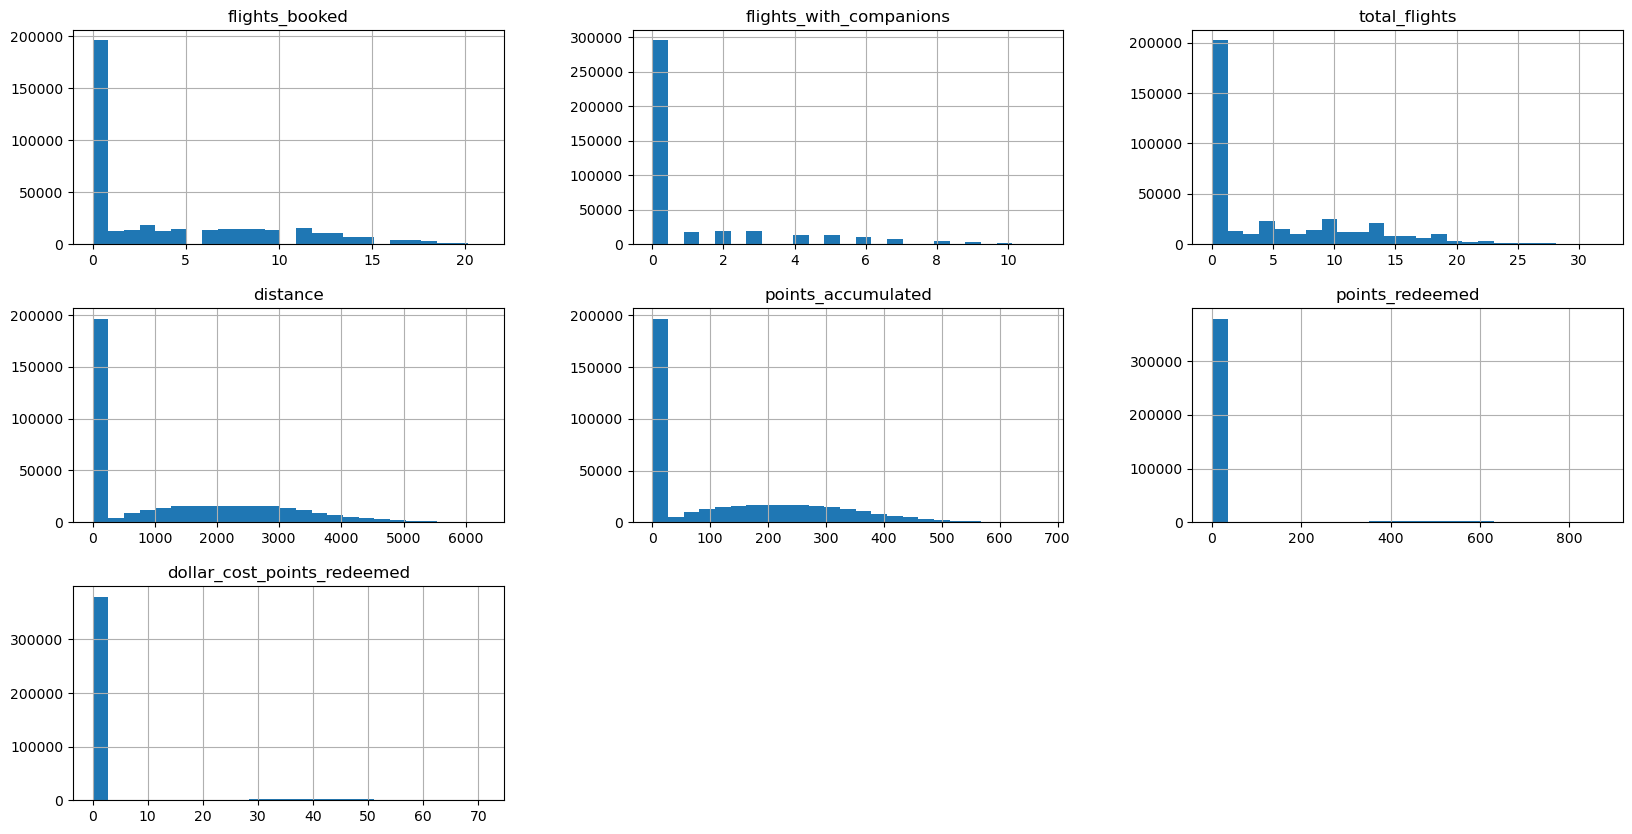

In [39]:
# Create a histogram to check the data distribution in the columns

df_flight[['flights_booked', 'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed']].hist(bins=25, figsize=(20,10));

In [40]:
# In the graphs above, we can see that the '0' values ​​significantly distort the data, 
# since there are a number of customers in our database who have not yet registered any flights.

df_flight.head(20)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,January,3,0,3,1521,152,0,0
1,100102,2017,January,10,4,14,2030,203,0,0
2,100140,2017,January,6,0,6,1200,120,0,0
3,100214,2017,January,0,0,0,0,0,0,0
4,100272,2017,January,0,0,0,0,0,0,0
5,100301,2017,January,0,0,0,0,0,0,0
6,100364,2017,January,0,0,0,0,0,0,0
7,100380,2017,January,0,0,0,0,0,0,0
8,100428,2017,January,6,0,6,606,60,0,0
9,100504,2017,January,0,0,0,0,0,0,0


In [41]:
# Create a DataFrame that filters 'active customers' to better analyze their activity
# filter by 'total_flights', because if there are no values ​​in this column, no data is recorded in the other columns

df_flight_active = df_flight[df_flight['total_flights'] > 0] # filter the data to only include records greater than '0'
df_flight_active.head(10) # print the DataFrame to check the results

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,January,3,0,3,1521,152,0,0
1,100102,2017,January,10,4,14,2030,203,0,0
2,100140,2017,January,6,0,6,1200,120,0,0
8,100428,2017,January,6,0,6,606,60,0,0
10,100550,2017,January,3,0,3,2037,203,0,0
11,863070,2017,September,8,7,15,4245,424,341,28
16,100727,2017,January,11,0,11,1144,114,0,0
18,100753,2017,January,8,4,12,3264,326,0,0
19,100816,2017,January,9,1,10,2340,234,0,0
20,100853,2017,January,6,6,12,1236,123,0,0


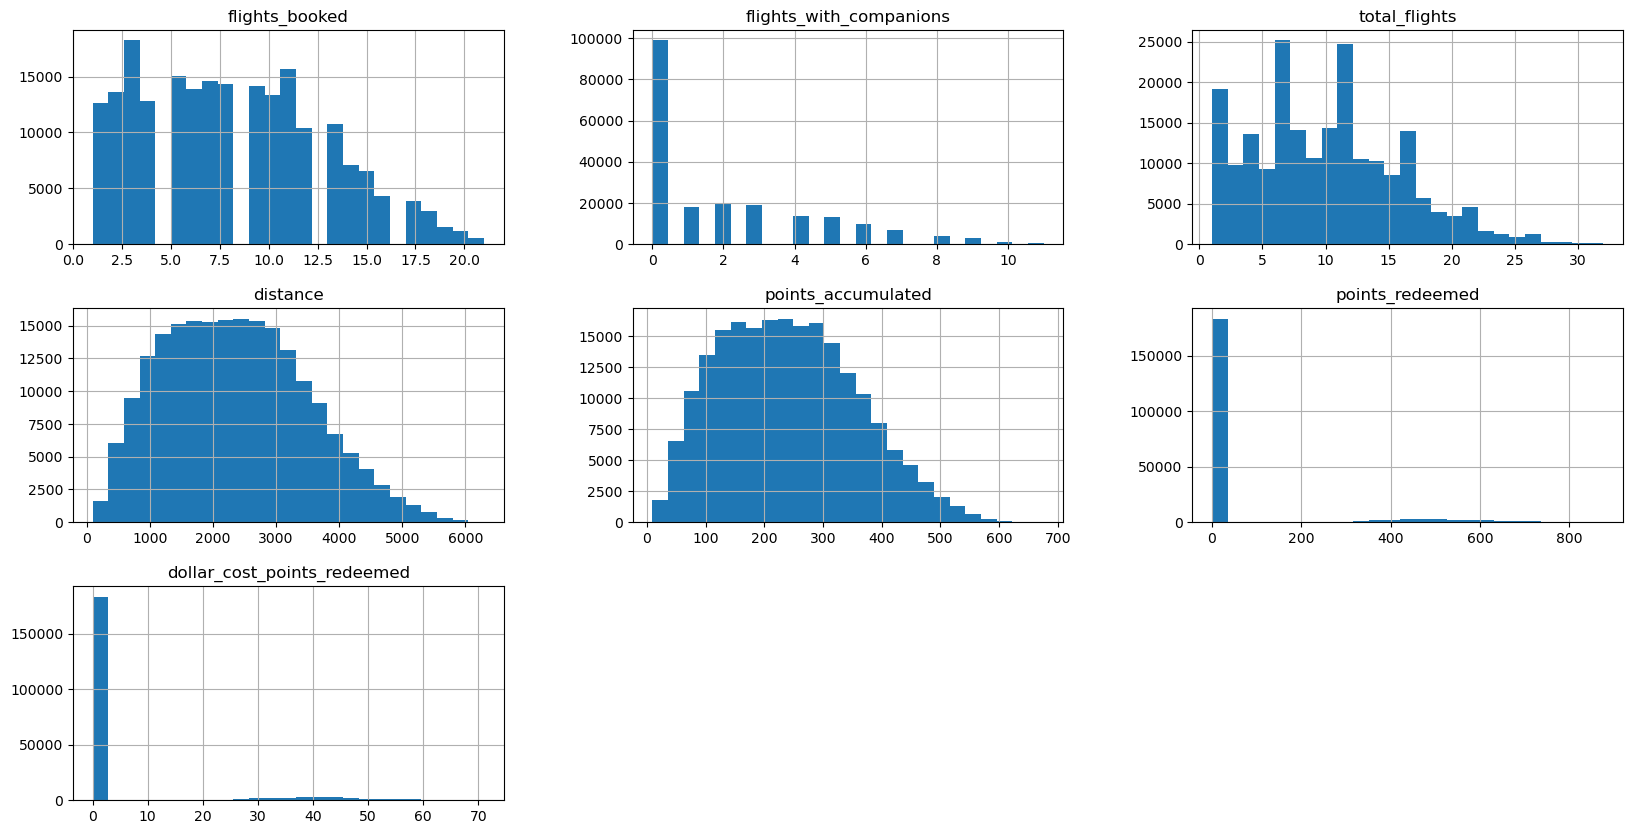

In [42]:
# Using the 'active customers' DataFrame, we can visualize the graphs better:

df_flight_active[['flights_booked', 'flights_with_companions', 'total_flights', 'distance',
                  'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed']].hist(bins=25, figsize=(20,10));

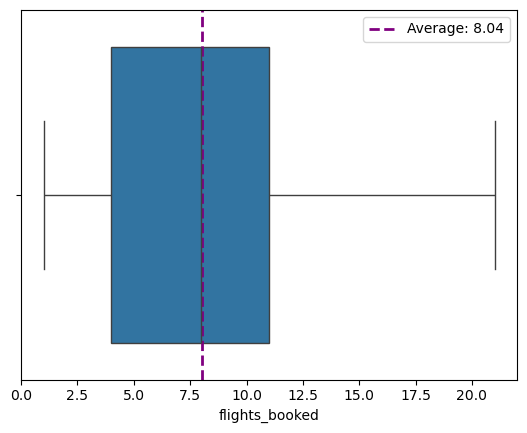

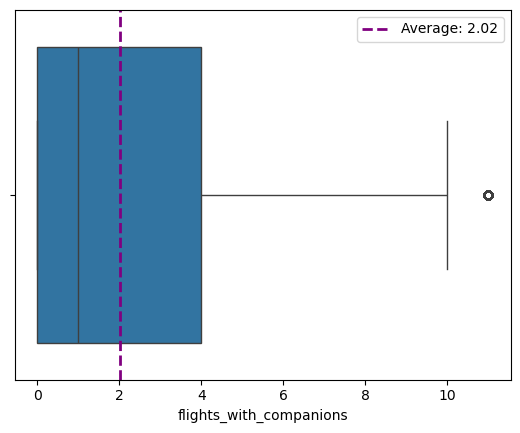

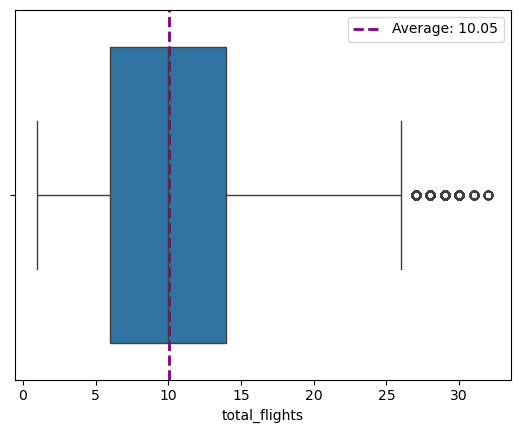

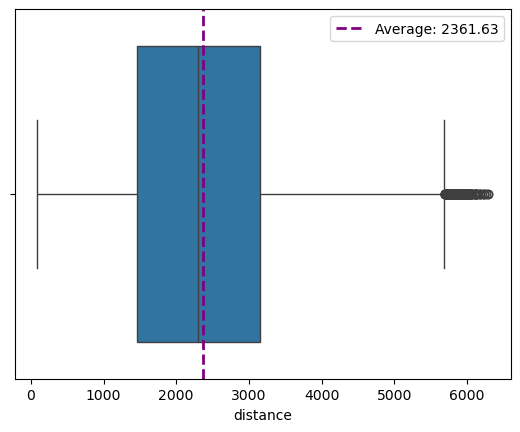

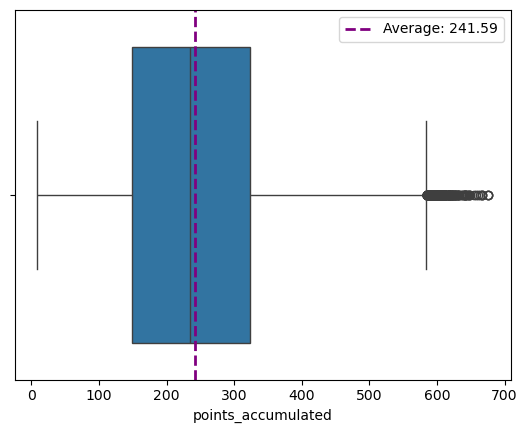

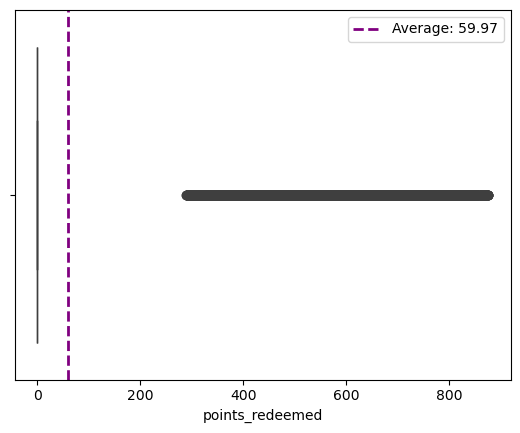

In [81]:
# Use the DataFrame containing 'active customers' and the relevant columns:
# Use a 'for' loop to iterate through the data in the selected columns and calculate the average value for each column (rounded to 2 decimal places)

for col in df_flight_active[['flights_booked', 
                             'flights_with_companions', 
                             'total_flights', 
                             'distance',
                             'points_accumulated',
                             'points_redeemed']].columns:
    mean_col = round(df_flight_active[col].mean(), 2) # the average is included in the graph
    sns.boxplot(data=df_flight_active, x=col)
    plt.axvline(x=mean_col, color='purple', linestyle='--', linewidth=2, label=f'Average: {mean_col}')
    plt.legend()
    plt.show();

### Some conclusions:

- Many customers have between 4 and 11 flights booked, which is consistent with the 'total_flights' chart (approximately 5 to 15 total flights).

- The average number of flights booked is 8 per customer, and the average total number of flights is 10.  It could be said that most booked flights are actually taken.

- Few customers have taken more than 25 flights.

- Most flights were solo travel (without companions), with an average of 2 solo flights per customer.

- The majority of flights are short-haul: between 1,500 and 3,000 miles. Few customers have taken longer flights.

- Customers accumulate points based on flight distance, between 150 and 300 points (which corresponds to the flight distance).

- It can be concluded that the vast majority have not used these accumulated points, since the average number of points used is 500 (considering that most customers currently have between 150 and 300 points, averaging 240).

- More flights were taken in 2018 compared to 2017.

- The month with the highest number of flights was November.

---

In [45]:
# 7. Checking the number of null values ​​in the DataFrame using the 'isnull()' and 'sum()' functions.

df_flight.isnull().sum() 
# no null data in any of the columns

loyalty_number                 0
year                           0
month                          0
flights_booked                 0
flights_with_companions        0
total_flights                  0
distance                       0
points_accumulated             0
points_redeemed                0
dollar_cost_points_redeemed    0
dtype: int64

In [ ]:
# We have a clean file with no duplicates, no null values, consistent column names, and appropriate data

df_flight.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   loyalty_number               403760 non-null  int64 
 1   year                         403760 non-null  object
 2   month                        403760 non-null  object
 3   flights_booked               403760 non-null  int64 
 4   flights_with_companions      403760 non-null  int64 
 5   total_flights                403760 non-null  int64 
 6   distance                     403760 non-null  int64 
 7   points_accumulated           403760 non-null  int32 
 8   points_redeemed              403760 non-null  int64 
 9   dollar_cost_points_redeemed  403760 non-null  int64 
dtypes: int32(1), int64(7), object(2)
memory usage: 32.3+ MB


In [46]:
df_flight.to_csv('../data/customer_flight_activity_clean.csv', index=False)

## II. Work with a DataFrame containing information about customer profiles and their membership details.

#### DataFrame: `df_loyalty`

---

In [48]:
# 1. Explore an overview of the DataFrame

display(df_loyalty.head(2)) # display the first few rows of the DataFrame
print('***' * 40)
display(df_loyalty.tail(2)) # display the latest rows from the DataFrame
print('***' * 40)
display(df_loyalty.sample(2)) # display random data from the DataFrame

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


************************************************************************************************************************


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


************************************************************************************************************************


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
11186,653191,Canada,Saskatchewan,Regina,S6J 3G0,Male,Bachelor,79172.0,Married,Star,2585.56,Standard,2016,1,NaN,NaN
8004,306872,Canada,Saskatchewan,Regina,S6J 3G0,Female,College,NaN,Married,Nova,8149.77,Standard,2014,12,NaN,NaN


In [49]:
# Observations:
# We see that there are some negative salary values ​​and some missing values
# The 'enrollment_month' data is represented numerically. It could be changed to the month names and treated as a categorical column
# There are missing values ​​in the 'cancellation_year' and 'cancellation_month' columns
# 'cancellation_year' and 'cancellation_month' are type 'float'; they could be changed to 'int'
# 'enrollment_type' has both numerical (year) and categorical values; it could be treated as a categorical column

In [91]:
# Explore the number of rows and columns in the DataFrame using the '.shape' method
# specifying the array index (0 for rows and 1 for columns)
 
print(f'The number of rows are: {df_loyalty.shape[0]}, the number of columns are: {df_loyalty.shape[1]}')

The number of rows are: 16737, the number of columns are: 16


In [52]:
# explore the column names:

df_loyalty.columns

# Note: observe a consistent pattern in the column names (all in English)
# However, we decide to modify all the names to lowercase, with words separated by underscores instead of spaces,
# as we plan to later insert data using Python and SQL

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [53]:
# Create a new dictionary to replace the column names with the new conditions
# Use a list comprehension to iterate through each column in the DataFrame

new_columns2 = {col: col.lower().replace(' ','_') for col in df_loyalty.columns}
new_columns2 # prints the dictionary with the original name and the name using the unified nomenclature

{'Loyalty Number': 'loyalty_number',
 'Country': 'country',
 'Province': 'province',
 'City': 'city',
 'Postal Code': 'postal_code',
 'Gender': 'gender',
 'Education': 'education',
 'Salary': 'salary',
 'Marital Status': 'marital_status',
 'Loyalty Card': 'loyalty_card',
 'CLV': 'clv',
 'Enrollment Type': 'enrollment_type',
 'Enrollment Year': 'enrollment_year',
 'Enrollment Month': 'enrollment_month',
 'Cancellation Year': 'cancellation_year',
 'Cancellation Month': 'cancellation_month'}

In [54]:
# Apply the column name changes using the dictionary created with 'rename()'

df_loyalty.rename(columns = new_columns2, inplace=True)
df_loyalty.columns # check the changes made

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month'],
      dtype='object')

In [55]:
# 2. Explore the information in the DataFrame

df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loyalty_number      16737 non-null  int64  
 1   country             16737 non-null  object 
 2   province            16737 non-null  object 
 3   city                16737 non-null  object 
 4   postal_code         16737 non-null  object 
 5   gender              16737 non-null  object 
 6   education           16737 non-null  object 
 7   salary              12499 non-null  float64
 8   marital_status      16737 non-null  object 
 9   loyalty_card        16737 non-null  object 
 10  clv                 16737 non-null  float64
 11  enrollment_type     16737 non-null  object 
 12  enrollment_year     16737 non-null  int64  
 13  enrollment_month    16737 non-null  int64  
 14  cancellation_year   2067 non-null   float64
 15  cancellation_month  2067 non-null   float64
dtypes: f

### Initial findings from exploring the DataFrame data:

- There are missing values ​​that need to be addressed before creating visualizations in the 'salary', 'cancellation_year', and 'cancellation_month' columns.

- There are negative values ​​in the 'salary' column that need to be addressed (salaries should not have negative values). This should be discussed with the company.

- The column names are consistent, so no changes are needed.

- The data in the 'enrollment_month' and 'cancellation_month' columns is represented as month numbers. It could be changed to the month names and treated as a categorical column.

- The data in the 'enrollment_year' and 'enrollment_month' columns is of type 'int'. It could be changed to 'object/str' and converted to categorical data.

- The data in the 'cancellation_year' and 'cancellation_month' columns is of type 'float'. It has been decided to change the data type to 'object/str' and convert it to categorical data.

---

In [56]:
# 3. Explore the number of missing values ​​in the DataFrame using 'isnull()' and 'sum()'
# There are a large number of missing values ​​in the DataFrame
# To ensure this doesn't affect subsequent analyses, we decide to address these missing values

df_loyalty.isnull().sum()

# Confirm that the columns with null data are 'salary', 'cancellation_year', and 'cancellation_month'

loyalty_number            0
country                   0
province                  0
city                      0
postal_code               0
gender                    0
education                 0
salary                 4238
marital_status            0
loyalty_card              0
clv                       0
enrollment_type           0
enrollment_year           0
enrollment_month          0
cancellation_year     14670
cancellation_month    14670
dtype: int64

In [57]:
# To decide how to handle missing values ​​in these columns, we need to view the percentage of missing values
# We can use the '.shape' method with index '0' which selects the rows

df_loyalty.isnull().sum()/df_loyalty.shape[0]*100 # to view it as a percentage

loyalty_number         0.000000
country                0.000000
province               0.000000
city                   0.000000
postal_code            0.000000
gender                 0.000000
education              0.000000
salary                25.321145
marital_status         0.000000
loyalty_card           0.000000
clv                    0.000000
enrollment_type        0.000000
enrollment_year        0.000000
enrollment_month       0.000000
cancellation_year     87.650117
cancellation_month    87.650117
dtype: float64

In [58]:
# Represent null values ​​in a DataFrame for better visualization, which helps us make decisions

null = round((df_loyalty.isnull().sum()/df_loyalty.shape[0]*100), 2).reset_index() # store the data as a percentage in a variable

null.rename(columns={'index': 'column', 0:'% null'}, inplace=True) # rename the columns of the new DataFrame
mask = null['% null'] > 0 # filter the data to show only values ​​greater than '0'
null = null[mask]
null

,column,% null
7,salary,25.32
14,cancellation_year,87.65
15,cancellation_month,87.65


### Conclusions regarding handling missing values:

- Found that 'salary' has 25% missing values.

- The columns 'cancellation_year' and 'cancellation_month' have 88% missing values.

In neither case can we impute these values ​​using the mean/median, so we must create a new category/value to use for imputation:

- 'No data' for the cancellation data ('cancellation_year' and 'cancellation_month'), since we can assume that these customers have not canceled their registration in the loyalty program. This data could potentially be updated in the future.

- For the salary data, since we can assume that the customer did not provide this information during registration, we replace the missing values ​​with '0'. This value can then be filtered out for subsequent analyses. This column could be updated in the future when this data becomes available.

---

In [59]:
# First, address the 'salary' column:

# Identify any negative values ​​in the 'salary' column
# Verify whether these are data entry errors, and if they are isolated cases, determine the reason

print(df_loyalty['salary'].describe()) # provides information about negative data
print('***' * 40)
display(df_loyalty[df_loyalty['salary'] < 0].head(10)) # filter the data that is less than '0' (negative values)
print('***' * 40)
print(df_loyalty[df_loyalty['salary'] < 0].count()) # count the number of rows that contain data with negative values

count     12499.000000
mean      79245.609409
std       35008.297285
min      -58486.000000
25%       59246.500000
50%       73455.000000
75%       88517.500000
max      407228.000000
Name: salary, dtype: float64
************************************************************************************************************************


,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
1082,542976,Canada,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.0,Divorced,Star,24127.50,2018 Promotion,2018,3,NaN,NaN
1894,959977,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
2471,232755,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,NaN,NaN
3575,525245,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,-45962.0,Married,Star,2402.33,2018 Promotion,2018,3,NaN,NaN
3932,603070,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,-19325.0,Single,Star,2893.74,2018 Promotion,2018,3,NaN,NaN
4712,491242,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,-43234.0,Married,Star,7597.91,2018 Promotion,2018,3,NaN,NaN
6560,115505,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
6570,430398,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3,NaN,NaN
7373,152016,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,NaN
8576,194065,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,2,NaN,NaN


************************************************************************************************************************
loyalty_number        20
country               20
province              20
city                  20
postal_code           20
gender                20
education             20
salary                20
marital_status        20
loyalty_card          20
clv                   20
enrollment_type       20
enrollment_year       20
enrollment_month      20
cancellation_year      2
cancellation_month     2
dtype: int64


In [60]:
# Convert negative values ​​to positive using 'abs()'
# abs: This function returns the absolute value of the number, which will always be positive

df_loyalty['salary'] = df_loyalty['salary'].abs()
df_loyalty.head(10) # print the first 10 rows of the DataFrame to verify the change

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
5,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,NaN,NaN
6,927943,Canada,Ontario,Toronto,P5S 6R4,Female,College,NaN,Single,Star,3857.95,Standard,2014,6,NaN,NaN
7,188893,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,12,NaN,NaN
8,852392,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,100159.0,Married,Star,3861.49,Standard,2015,5,NaN,NaN
9,866307,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,10,NaN,NaN


In [61]:
# check the number of null values ​​in the 'salary' column using 'isnull()' and 'sum()'

df_loyalty['salary'].isnull().sum()

4238

In [63]:
# replace null values ​​with '0' in the 'salary' column using 'value_counts()' and 'fillna()'

df_loyalty['salary'].value_counts(normalize=True) # returns the relative frequency of unique data values
df_loyalty['salary'] = df_loyalty['salary'].fillna(0)

comprobation_null = df_loyalty['salary'].isnull().sum() # obtain the total sum of null values

# to check the changes
print(f'Nulls in the column "Salary": {comprobation_null}') 
print('***' * 40)
display(df_loyalty.head(10)) # print the first 10 rows of the DataFrame to verify the change

Nulls in the column "Salary": 0
************************************************************************************************************************


,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,0.0,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,0.0,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,0.0,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
5,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,NaN,NaN
6,927943,Canada,Ontario,Toronto,P5S 6R4,Female,College,0.0,Single,Star,3857.95,Standard,2014,6,NaN,NaN
7,188893,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,12,NaN,NaN
8,852392,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,100159.0,Married,Star,3861.49,Standard,2015,5,NaN,NaN
9,866307,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,10,NaN,NaN


In [64]:
# Convert the data from type 'float' to type 'int' using 'astype()'
# We recommend to the company: For future entries, these should be entered as whole numbers, updating any values ​​that are currently '0'

df_loyalty['salary'] = df_loyalty['salary'].astype(int)
df_loyalty.info() # print the DataFrame information to verify the change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loyalty_number      16737 non-null  int64  
 1   country             16737 non-null  object 
 2   province            16737 non-null  object 
 3   city                16737 non-null  object 
 4   postal_code         16737 non-null  object 
 5   gender              16737 non-null  object 
 6   education           16737 non-null  object 
 7   salary              16737 non-null  int32  
 8   marital_status      16737 non-null  object 
 9   loyalty_card        16737 non-null  object 
 10  clv                 16737 non-null  float64
 11  enrollment_type     16737 non-null  object 
 12  enrollment_year     16737 non-null  int64  
 13  enrollment_month    16737 non-null  int64  
 14  cancellation_year   2067 non-null   float64
 15  cancellation_month  2067 non-null   float64
dtypes: f

In [65]:
# Check of the DataFrame, looking at the columns that still need to be processed

print(df_loyalty.isnull().sum())

loyalty_number            0
country                   0
province                  0
city                      0
postal_code               0
gender                    0
education                 0
salary                    0
marital_status            0
loyalty_card              0
clv                       0
enrollment_type           0
enrollment_year           0
enrollment_month          0
cancellation_year     14670
cancellation_month    14670
dtype: int64


In [66]:
# check the data type of these columns

print(df_loyalty[['cancellation_year', 'cancellation_month']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cancellation_year   2067 non-null   float64
 1   cancellation_month  2067 non-null   float64
dtypes: float64(2)
memory usage: 261.6 KB
None


In [67]:
# Convert the data from type 'float' to 'int' and remove the decimals, using 'astype()'
# Convert it to type 'object' in the 'cancellation_year' and 'cancellation_month' columns

df_loyalty[['cancellation_year', 'cancellation_month']] = df_loyalty[['cancellation_year', 'cancellation_month']].astype('Int64')
df_loyalty[['cancellation_year', 'cancellation_month']].info() # print the DataFrame information to verify the change

# The 'Int64' data type handles NaN values ​​and does not modify them, allowing for imputation operations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   cancellation_year   2067 non-null   Int64
 1   cancellation_month  2067 non-null   Int64
dtypes: Int64(2)
memory usage: 294.3 KB


In [68]:
# Replace null values ​​with '0', which will then be used as a new category in the month name mapping
# Use the 'value_counts()' and 'fillna()' functions

df_loyalty[['cancellation_year', 'cancellation_month']].value_counts(normalize=True)
df_loyalty[['cancellation_year', 'cancellation_month']] = df_loyalty[['cancellation_year', 'cancellation_month']].fillna(0)
print(df_loyalty[['cancellation_year', 'cancellation_month']].isnull().sum()) # check if there are no more null values ​​in the data

cancellation_year     0
cancellation_month    0
dtype: int64


In [69]:
# verify the data:

df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loyalty_number      16737 non-null  int64  
 1   country             16737 non-null  object 
 2   province            16737 non-null  object 
 3   city                16737 non-null  object 
 4   postal_code         16737 non-null  object 
 5   gender              16737 non-null  object 
 6   education           16737 non-null  object 
 7   salary              16737 non-null  int32  
 8   marital_status      16737 non-null  object 
 9   loyalty_card        16737 non-null  object 
 10  clv                 16737 non-null  float64
 11  enrollment_type     16737 non-null  object 
 12  enrollment_year     16737 non-null  int64  
 13  enrollment_month    16737 non-null  int64  
 14  cancellation_year   16737 non-null  Int64  
 15  cancellation_month  16737 non-null  Int64  
dtypes: I

In [70]:
# Convert the data type from 'int' to 'object' in the columns 'enrollment_year', 'enrollment_month', 'cancellation_year', and 'cancellation_month'

df_loyalty[['enrollment_year', 'enrollment_month', 'cancellation_year', 'cancellation_month']] = df_loyalty[['enrollment_year', 'enrollment_month', 'cancellation_year', 'cancellation_month']].astype(str)
df_loyalty[['enrollment_year', 'enrollment_month', 'cancellation_year', 'cancellation_month']].info() # print the DataFrame information to verify the change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   enrollment_year     16737 non-null  object
 1   enrollment_month    16737 non-null  object
 2   cancellation_year   16737 non-null  object
 3   cancellation_month  16737 non-null  object
dtypes: object(4)
memory usage: 523.2+ KB


In [71]:
# Convert the month numbers to month names for better readability
# Using a dictionary as a mapping to assign a month name to each number, and assigning a new category to null values ​​('0')

map_mmonths = {'0': 'No data', '1': 'January', '2': 'February', '3': 'March', '4': 'April', '5': 'May', '6': 'June', 
            '7': 'July', '8': 'August', '9': 'September', '10': 'October', '11': 'November', '12': 'December'}

for col in df_loyalty[['enrollment_month','cancellation_month', 'cancellation_year']].columns:
    df_loyalty[col] = df_loyalty[col].replace(map_mmonths)
    print(df_loyalty[col].unique())

# use 'replace' to ensure that it does not affect the non-null values ​​in the 'cancellation_month' and 'cancellation_year' columns
# verify that in the 'enrollment_month' column, which previously had no null values, there are now 12 entries with the names of the months

# However, in the 'cancellation_month' column, where we had null values ​​imputed with '0', these are replaced with 'No data' (resulting in 13 different categories)
# 'cancellation_year', the null values ​​are replaced with 'No data', while the remaining values, which are not in the mapping, remain unchanged

['February' 'March' 'July' 'October' 'May' 'June' 'December' 'January'
 'November' 'August' 'April' 'September']
['No data' 'January' 'December' 'April' 'February' 'July' 'November' 'May'
 'June' 'October' 'August' 'September' 'March']
['No data' '2018' '2015' '2017' '2014' '2016' '2013']


In [72]:
# 4. Explore the data in the categorical columns using 'describe()'

df_loyalty.describe(include='O').T

,count,unique,top,freq
country,16737,1,Canada,16737
province,16737,11,Ontario,5404
city,16737,29,Toronto,3351
postal_code,16737,55,V6E 3D9,911
gender,16737,2,Female,8410
education,16737,5,Bachelor,10475
marital_status,16737,3,Married,9735
loyalty_card,16737,3,Star,7637
enrollment_type,16737,2,Standard,15766
enrollment_year,16737,7,2018,3010


In [73]:
# Observations:
# The country of study is Canada
# The province with the most registered customers is Ontario, and the city with the most is Toronto
# There are more female customer registrations
# The most common educational level is "Bachelor's degree" and the most common marital status is "Married"
# The most popular loyalty card is "Star" and the most common registration type is "Standard"
# The year with the most registrations was 2018, and the month with the most registrations was May
# Most customers have not canceled their registrations in the database

In [74]:
# explore the data in the numerical columns using 'describe()'

df_loyalty.describe().T

# conclude that the mean and median are not close in the 'clv' data, but they are closer in the 'salary' data
# Also, the data dispersion is high

,count,mean,std,min,25%,50%,75%,max
loyalty_number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
salary,16737.0,59264.647308,45746.427785,0.00,0.00,63654.00,82940.00,407228.00
clv,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38


In [75]:
# 5. Explore the DataFrame to detect duplicate records

print(f'Duplicate data in the DataFrame: {df_loyalty.duplicated().sum()}') # use the functions 'duplicated()' and 'sum()'

Duplicate data in the DataFrame: 0


In [76]:
# 6. Analysis of categorical variables, using the 'select_dtypes()' and 'value_count()' functions within a 'for' loop

for col in df_loyalty.select_dtypes(include='O').columns:
    print(f'Column --> {col}')
    print(f'{df_loyalty[col].value_counts()}') # shows how many times a piece of data appears in each category
    print('***' * 25)

Column --> country
country
Canada    16737
Name: count, dtype: int64
***************************************************************************
Column --> province
province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64
***************************************************************************
Column --> city
city
Toronto           3351
Vancouver         2582
Montreal          2059
Winnipeg           658
Whistler           582
Halifax            518
Ottawa             509
Trenton            486
Edmonton           486
Quebec City        485
Dawson Creek       444
Fredericton        425
Regina             409
Kingston           401
Tremblant          398
Victoria           389
Hull            

In [77]:
# Observations:
# Ontario is the dominant province, and Toronto is where most registered customers reside
# Registrations have increased every year, particularly in 2018. We have no data for 2013 and 2014
# May is the month with the most registrations, followed by December in second place
# Many customers have canceled their registrations, but the year with the most cancellations was 2018, mainly in December

In [78]:
# 7. Analysis of numerical variables, using the visualization tools 'histogram' and 'boxplot'
# Select the columns that provide useful information

df_loyalty.select_dtypes(include='number').columns # for the type of numerical data

Index(['loyalty_number', 'salary', 'clv'], dtype='object')

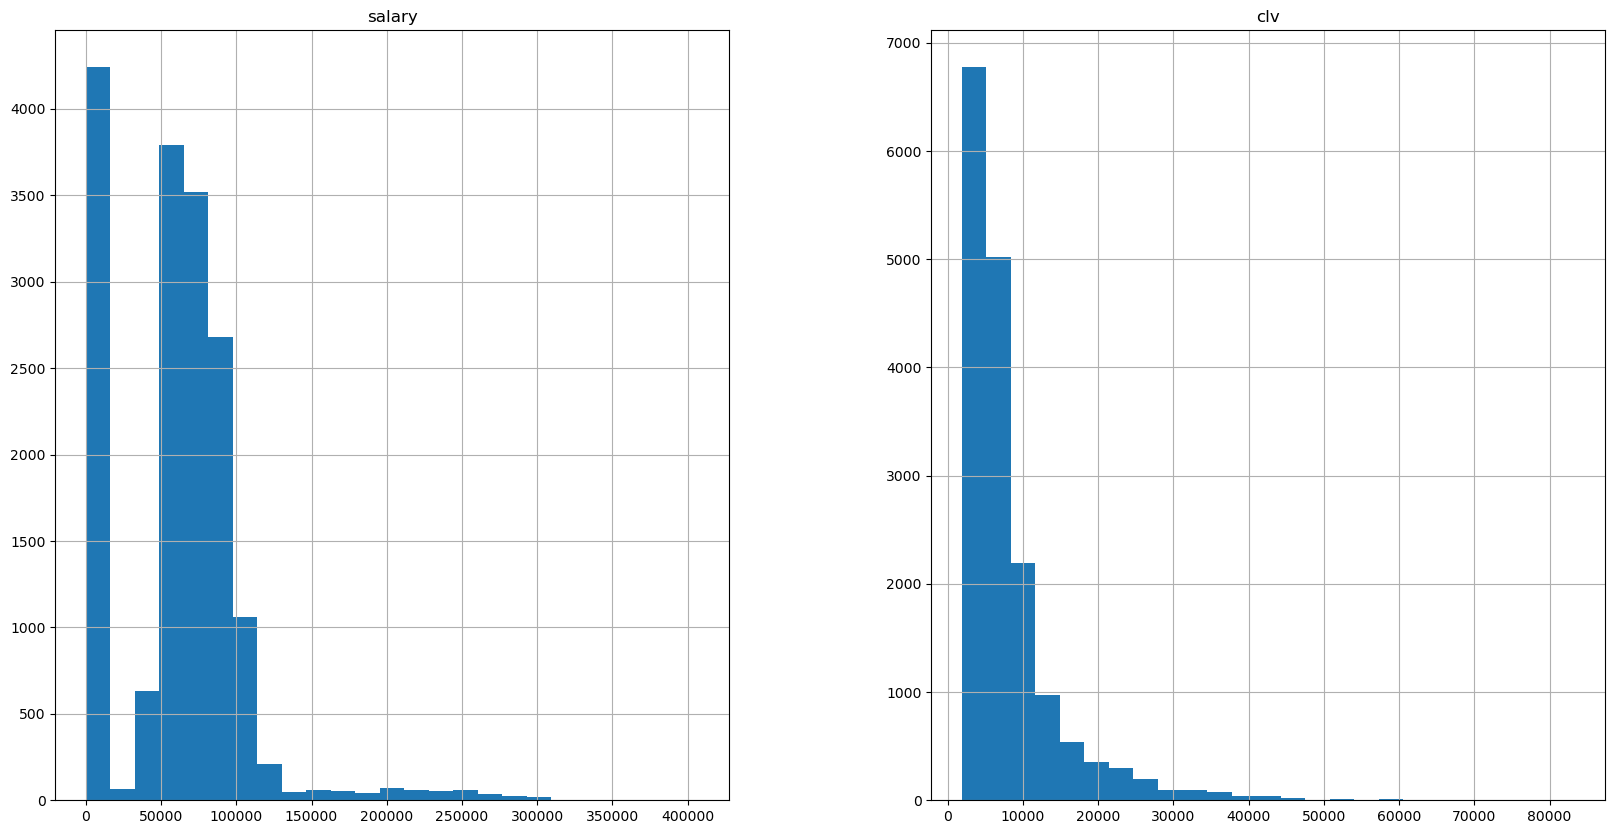

In [79]:
# Create a histogram to analyze the distribution of data in the 'salary' and 'clv' columns
# Customer lifetime value (CLV): This refers to the total revenue or profit generated by a customer throughout their entire relationship with the company

df_loyalty[['salary', 'clv']].hist(bins=25, figsize=(20,10));

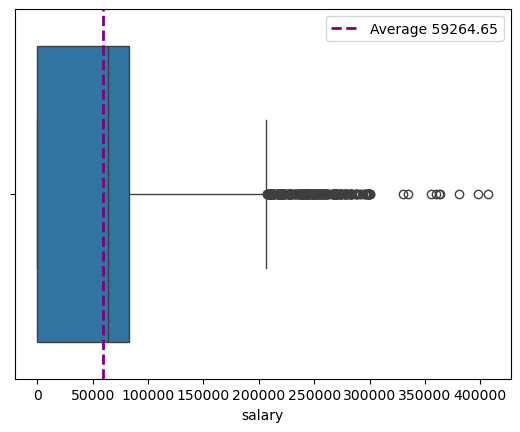

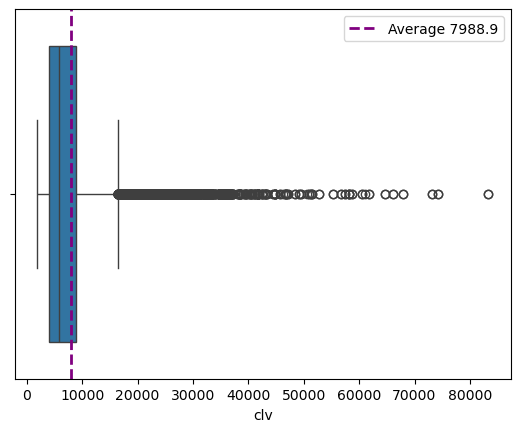

In [82]:
# use the columns that provide us with relevant information
# Use a 'for' loop to iterate through the data in the selected columns, and calculate the average for each column (rounded to 2 decimal places)

for col in df_loyalty[['salary', 'clv']].columns:
    mean_col = round(df_loyalty[col].mean(), 2) # the average is included in the graph
    sns.boxplot(data=df_loyalty, x=col)
    plt.axvline(x=mean_col, color='purple', linestyle='--', linewidth=2, label=f'Average {mean_col}')
    plt.legend()
    plt.show();

### Some conclusions:

- There are a significant number of outliers in the salary and CLV (Customer Lifetime Value) graph, starting at approximately 200,000 and 20,000, respectively.

- It can be inferred that there is a direct and positive correlation between salary and the profit generated by customers.

- Most customers have a salary below 100,000, and generate less than 10,000 in profit.

- The median and mean values ​​are affected by these outliers, with the average salary being approximately 60,000 and the average profit approximately 8,000.

---

In [88]:
df_loyalty.to_csv('../data/customer_loyalty_history_clean.csv', index=False)

## III. Work with DataFrames containing flight and customer information, which have already been cleaned and analyzed individually, in order to combine them into a single DataFrame.

#### DataFrame: `df_complete`

---

In [83]:
# verify the information and data in each DataFrame to select the column for joining

display(df_flight.head())
display(df_loyalty.head())

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,January,3,0,3,1521,152,0,0
1,100102,2017,January,10,4,14,2030,203,0,0
2,100140,2017,January,6,0,6,1200,120,0,0
3,100214,2017,January,0,0,0,0,0,0,0
4,100272,2017,January,0,0,0,0,0,0,0


,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016,February,No data,No data
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,0,Divorced,Star,3839.61,Standard,2016,March,No data,No data
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,0,Single,Star,3839.75,Standard,2014,July,2018,January
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,0,Single,Star,3839.75,Standard,2013,February,No data,No data
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495,Married,Star,3842.79,Standard,2014,October,No data,No data


In [84]:
df_flight.info()
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   loyalty_number               403760 non-null  int64 
 1   year                         403760 non-null  object
 2   month                        403760 non-null  object
 3   flights_booked               403760 non-null  int64 
 4   flights_with_companions      403760 non-null  int64 
 5   total_flights                403760 non-null  int64 
 6   distance                     403760 non-null  int64 
 7   points_accumulated           403760 non-null  int32 
 8   points_redeemed              403760 non-null  int64 
 9   dollar_cost_points_redeemed  403760 non-null  int64 
dtypes: int32(1), int64(7), object(2)
memory usage: 32.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non

In [85]:
# Both dataframes contain the 'loyalty_number' column
# We decide to merge the two dataframes using this column, employing the 'merge()' function, which returns a dataframe with the matching rows
# Merge the dataframe with customer information with the dataframe containing flight information

df_complete = df_flight.merge(df_loyalty, on='loyalty_number')
df_complete.head() # Print the first 5 columns of the DataFrame to verify the join

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,January,3,0,3,1521,152,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552,Married,Aurora,7919.20,Standard,2016,August,No data,No data
1,100102,2017,January,10,4,14,2030,203,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,0,Single,Nova,2887.74,Standard,2013,March,No data,No data
2,100140,2017,January,6,0,6,1200,120,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,0,Divorced,Nova,2838.07,Standard,2016,July,No data,No data
3,100214,2017,January,0,0,0,0,0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253,Married,Star,4170.57,Standard,2015,August,No data,No data
4,100272,2017,January,0,0,0,0,0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163,Divorced,Star,6622.05,Standard,2014,January,No data,No data


In [86]:
# print the information of the DataFrame to check the data and columns

df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               403760 non-null  int64  
 1   year                         403760 non-null  object 
 2   month                        403760 non-null  object 
 3   flights_booked               403760 non-null  int64  
 4   flights_with_companions      403760 non-null  int64  
 5   total_flights                403760 non-null  int64  
 6   distance                     403760 non-null  int64  
 7   points_accumulated           403760 non-null  int32  
 8   points_redeemed              403760 non-null  int64  
 9   dollar_cost_points_redeemed  403760 non-null  int64  
 10  country                      403760 non-null  object 
 11  province                     403760 non-null  object 
 12  city                         403760 non-null  object 
 13 

In [93]:
# Explore the number of rows and columns in the DataFrame using '.shape' 
# specifying the array index (0 for rows and 1 for columns)
 
print(f'The number of rows are: {df_complete.shape[0]}, the number of columns are: {df_complete.shape[1]}')

The number of rows are: 403760, the number of columns are: 25


In [94]:
# We confirm that there are unique values ​​for 'loyalty_number' in each DataFrame

print(df_flight['loyalty_number'].nunique())
print(df_loyalty['loyalty_number'].nunique())

# checked how many times each customer's 'loyalty number' appears in the 'df_flight' DataFrame, as some customers have multiple flight records

print(df_flight['loyalty_number'].value_counts().head())

# Confirm that the DataFrame 'df_completo' contains the combined flight data, enriched with customer information

16737
16737
loyalty_number
974875    48
736504    48
890702    48
617489    48
200519    47
Name: count, dtype: int64


In [101]:
df_complete.to_csv('../data/customer_loyalty_activity_complete.csv', index=False)

## IV. Visualization for making queries and answering questions

Dataframe: `df_flight`, `df_loyalty`, `df_completo`

---

In [95]:
# columns in the complete DataFrame

df_complete.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')

### 1. How is the number of flight bookings distributed across the months of the year?

---

In [96]:
# Create a format mask to order the months for better readability.

order_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Apply using Pandas (Categorical) to sort the specified category by defining the 'categories' parameter with the previously established order

df_complete['month'] = pd.Categorical(df_complete['month'], categories=order_month, ordered=True)

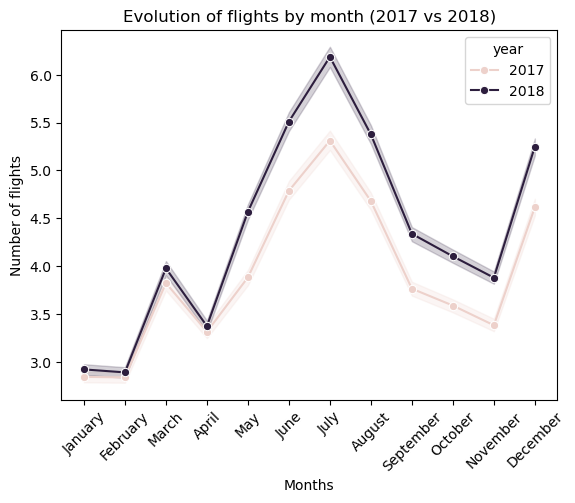

In [97]:
# Use 'lineplot' to visualize the distribution and trend by month and year
# The 'seaborn' library ('lineplot') can handle both categorical (month) and numerical (number of flights) variables

sns.lineplot(data=df_complete, x='month', y='flights_booked', hue='year', marker='o') # marker='o' does not indicate each month on the graph
plt.title('Evolution of flights by month (2017 vs 2018)')
plt.xticks(rotation = 45)
plt.ylabel('Number of flights')
plt.xlabel('Months')
plt.show();

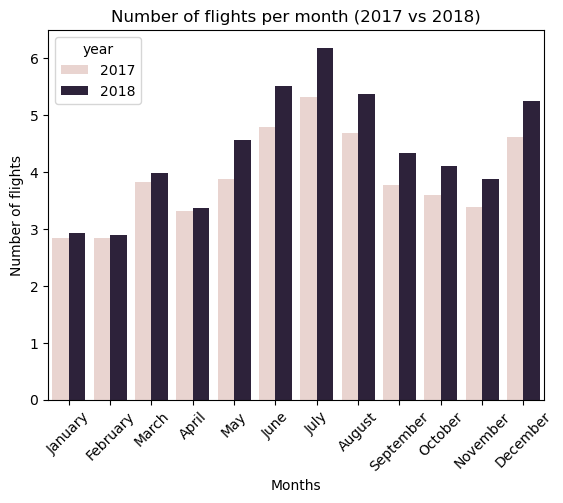

In [98]:
# Visualize using 'seaborn' (barplot) to see the distribution by month, comparing each year

sns.barplot(data=df_complete, x='month', y='flights_booked', errorbar=None, hue='year')
plt.title('Number of flights per month (2017 vs 2018)')
plt.xticks(rotation=45)
plt.ylabel('Number of flights')
plt.xlabel('Months')
plt.show();

### Conclusions:

- In 2018, there were more flight bookings compared to 2017.

- July 2018 saw the highest number of bookings compared to July 2017.

- The monthly distribution of flight bookings follows the same pattern for both years, with February being the month with the fewest bookings.

---

### 2. Is there a relationship between flight distance and the number of points earned by customers?

---

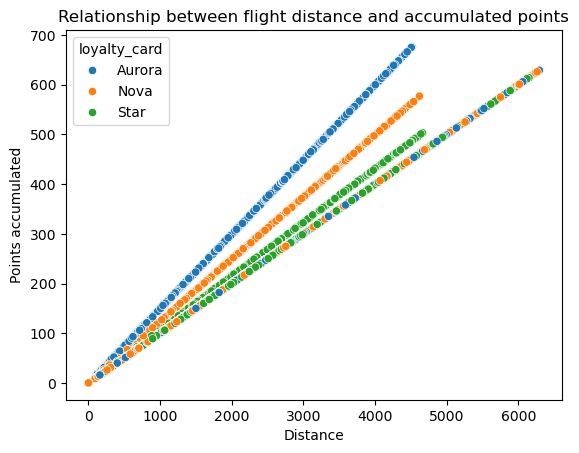

In [99]:
# Use 'seaborn' ('scatterplot') to visualize the relationship between two numerical variables:

sns.scatterplot(data=df_complete, x='distance', y='points_accumulated', hue='loyalty_card', color='pink')
plt.title('Relationship between flight distance and accumulated points')
plt.ylabel('Points accumulated')
plt.xlabel('Distance')
plt.show();

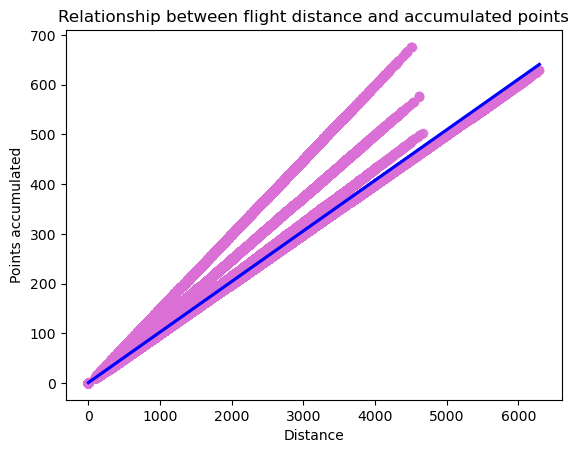

In [100]:
# Visualize the relationship between two numerical variables using 'seaborn' ('regplot')
# This helps to see the regression line (relationship) between the two variables

sns.regplot(data=df_complete, x='distance', y='points_accumulated', color='orchid', line_kws={"color": "blue"})
plt.title('Relationship between flight distance and accumulated points')
plt.ylabel('Points accumulated')
plt.xlabel('Distance')
plt.show();

### Conclusions:

- There is a positive linear relationship between flight distance and accumulated points. The longer the flight distance, the more points accumulated.

---

### 3. What is the distribution of customers by province or state?

---

In [102]:
# Display the data from highest to lowest
# Group by province and calculate the total number of customers, using the 'groupby()' and 'count()' functions

df_group = df_loyalty.groupby('province', as_index=False)['loyalty_number'].count()

# Sort from highest to lowest using the 'sort_values()' function with the parameter 'ascending=False'

df_group = df_group.sort_values('loyalty_number', ascending=False)

In [103]:
# color palette settings for the graph

custom_palette11 = sns.color_palette('BuPu_r', n_colors=11)

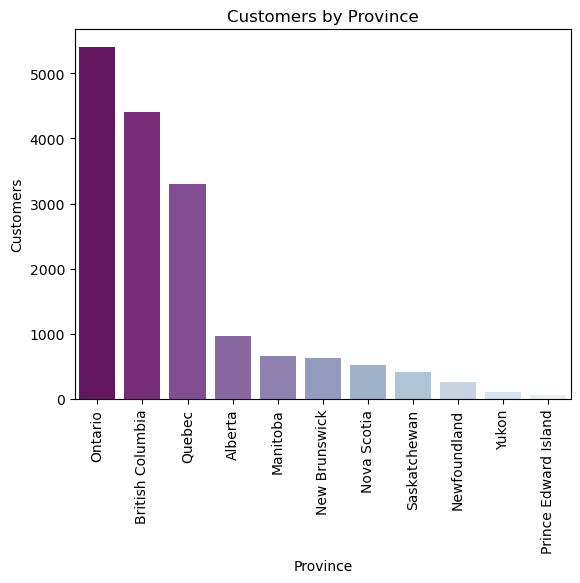

In [104]:
# Visualize the data using 'seaborn' (barplot) to show the distribution of customers by province in a bar chart
# Using the previously created DataFrame

sns.barplot(data=df_group, x='province', y='loyalty_number', errorbar=None, palette=custom_palette11)
plt.title('Customers by Province')
plt.xticks(rotation=90)
plt.ylabel('Customers')
plt.xlabel('Province')
plt.show();

### Conclusions:

- The province with the most records is Ontario.

- The province with the fewest customers is Prince Edward Island.

---

### 4. How does the average salary compare across different educational levels of the clients?

---

In [105]:
# Check the columns of the DataFrame to be used:

df_loyalty.columns  

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month'],
      dtype='object')

In [106]:
# Check the data type of the columns we want to analyze
# This helps us decide which visualization method to use

df_loyalty[['salary', 'education']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   salary     16737 non-null  int32 
 1   education  16737 non-null  object
dtypes: int32(1), object(1)
memory usage: 196.3+ KB


In [107]:
# color palette settings for the graph

custom_palette5 = sns.color_palette('BuPu_r', n_colors=5)

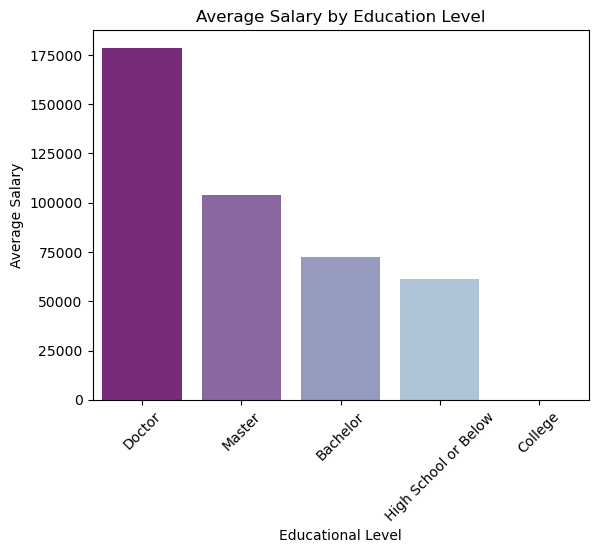

In [ ]:
# Sort the data from highest to lowest and store it in a variable
# Group the data by education level, using the 'groupby()', 'mean()' functions to calculate the average, and 'sort_values()' to sort from highest to lowest

order_education = df_loyalty.groupby('education')['salary'].mean().sort_values(ascending=False).index

# Use 'seaborn' (barplot) to create a bar chart that shows the relationship between a numerical variable ('salary') and a categorical variable ('education')
# Apply the previously defined order

sns.barplot(data=df_loyalty, x='education', y='salary', order=order_education, errorbar=None, palette=custom_palette5)
plt.xticks(rotation=45)
plt.title('Average Salary by Education Level')
plt.ylabel('Average Salary')
plt.xlabel('Educational Level')
plt.show();

### Conclusions:

- The highest average salaries are found among clients with doctoral degrees.

- No salary data was recorded for clients with a "College" level of education. We recommend that the company review the data for these clients with this educational level.

- It was observed that the missing data (represented as "0") corresponds to the "College" educational level.

---

### 5. What is the proportion of customers with different types of loyalty cards?

---

In [109]:
# Check the columns of the DataFrame to be used:

df_loyalty.columns  

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month'],
      dtype='object')

In [ ]:
# Check the data type of the columns you want to analyze
# 'loyalty_number' represents a unique customer identifier (it does not repeat)

df_loyalty[['loyalty_number', 'loyalty_card']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loyalty_number  16737 non-null  int64 
 1   loyalty_card    16737 non-null  object
dtypes: int64(1), object(1)
memory usage: 261.6+ KB


In [113]:
# Check the number of 'loyalty cards' in the DataFrame, by category
# Each loyalty card represents one customer

display(df_loyalty['loyalty_card'].value_counts())
print(f'Total customers numbers: {df_loyalty['loyalty_card'].value_counts().sum()}') # total number of customers in the DataFrame

loyalty_card
Star      7637
Nova      5671
Aurora    3429
Name: count, dtype: int64

Total customers numbers: 16737


In [114]:
# color palette settings for the graph

custom_palette_asc = sns.color_palette('BuPu_r', n_colors=3)

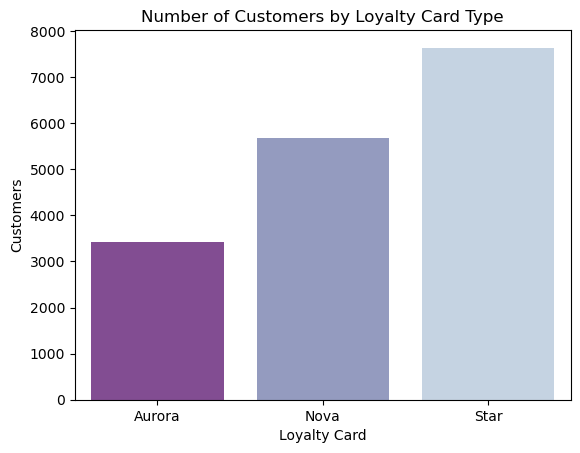

In [115]:
# Create a new DataFrame
# Group data using the 'groupby()' function and count the number of customers for each Loyalty Card type using the 'count()' function

df_loyalty_card = df_loyalty.groupby('loyalty_card', as_index=False)['loyalty_number'].count()

# Use 'seaborn' (barplot) to visualize a numerical variable 'loyalty_number' with a categorical variable 'loyalty_card'

sns.barplot(data=df_loyalty_card, x='loyalty_card', y='loyalty_number', errorbar=None, palette=custom_palette_asc)
plt.title('Number of Customers by Loyalty Card Type')
plt.ylabel('Customers')
plt.xlabel('Loyalty Card')
plt.show();

In [116]:
# color palette settings for the graph

custom_palette3 = sns.color_palette('BuPu_r', n_colors=3)

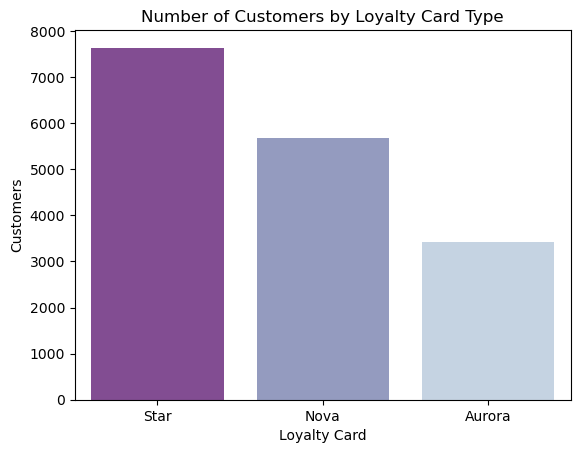

In [117]:
# Knowing that there are no duplicate values ​​in the customer IDs (loyalty_number)
# Use 'seaborn' and the 'countplot' function to count the frequency of each loyalty card number in the DataFrame

sns.countplot(data=df_loyalty, x='loyalty_card', order=df_loyalty['loyalty_card'].value_counts().index, palette=custom_palette3)
plt.title('Number of Customers by Loyalty Card Type')
plt.ylabel('Customers')
plt.xlabel('Loyalty Card')
plt.show();

In [119]:
# Use the DataFrame that contains the grouping of 'loyalty_card'

df_loyalty_card = df_loyalty.groupby('loyalty_card', as_index=False)['loyalty_number'].count()

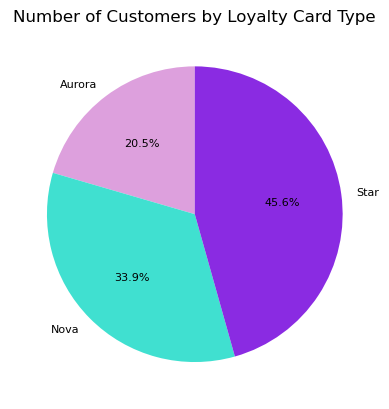

In [ ]:
# We can create a graph using 'matplotlib' ('plt.pie') to see the percentage of each group

colors = ['plum', 'turquoise', 'blueviolet'] # color palette for the chart

plt.pie('loyalty_number', labels='loyalty_card',
        data=df_loyalty_card,
        autopct=  '%1.1f%%',
        colors = colors, 
        textprops={'fontsize': 8}, 
        startangle=90)
plt.title('Number of Customers by Loyalty Card Type')
plt.show();

### Conclusions:

- The loyalty card category with the most customers is: 'Star'.

- The loyalty card category with the fewest registered customers is 'Aurora'.

---

### 6. How are customers distributed according to their marital status and gender?

---

In [121]:
# Check the columns of the DataFrame that contain the information we need

df_loyalty.columns

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month'],
      dtype='object')

In [122]:
# Check the data type of the columns we are interested in, to determine which visualization method we can use.

df_loyalty[['loyalty_number', 'gender', 'marital_status']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loyalty_number  16737 non-null  int64 
 1   gender          16737 non-null  object
 2   marital_status  16737 non-null  object
dtypes: int64(1), object(2)
memory usage: 392.4+ KB


In [123]:
# Group data by category using the 'groupby()' function, based on gender and marital status
# Use the 'size()' function to count the number of rows per gender and the 'sort_values()' function to sort by 'loyalty_number' in descending order
# Sort the data and store it in a new DataFrame for plotting, using 'loyalty_number' as the index

df_distribution = df_loyalty.groupby(['gender', 'marital_status']).size().reset_index(name='loyalty_number').sort_values('loyalty_number', ascending=False)
df_distribution

,gender,marital_status,loyalty_number
1,Female,Married,4869
4,Male,Married,4866
2,Female,Single,2272
5,Male,Single,2212
0,Female,Divorced,1269
3,Male,Divorced,1249


In [124]:
# Sort by marital status category to maintain the correct order, using 'pd.Categorical'

order_civil_status = df_distribution['marital_status'].unique()
df_distribution['marital_status'] = pd.Categorical(df_distribution['marital_status'], categories=order_civil_status, ordered=True)

In [125]:
# color palette settings for the graph

custom_palette2 = sns.color_palette('BuPu', n_colors=2)

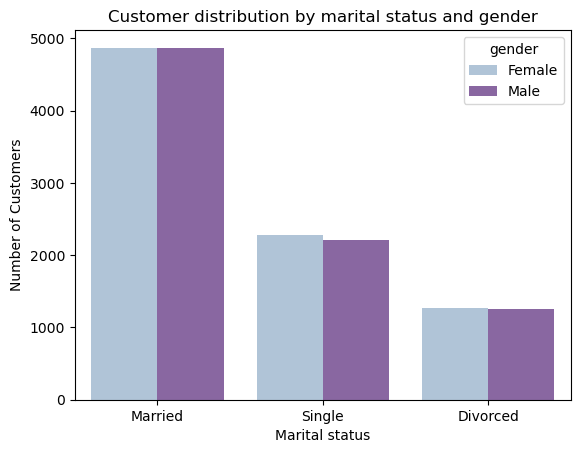

In [126]:
# Use 'seaborn' (barplot) to visualize the relationship between 1 numerical categorical variable and 2 categorical variables, applying category ordering

sns.barplot(data=df_distribution, x='marital_status', y='loyalty_number', hue='gender', errorbar=None, palette=custom_palette2)
plt.title('Customer distribution by marital status and gender')
plt.ylabel('Number of Customers')
plt.xlabel('Marital status')
plt.show();

In [127]:
# Since each row represents a customer, and there are no duplicate entries, we can also visualize this data using Seaborn's 'countplot'

# 'countplot' does not automatically sort the bars from highest to lowest
# To calculate the number of customers by marital status, use the 'value_counts()' function, and then sort the results from highest to lowest using the 'sort_values()' function
# This will generate an ordered list

order_civil_status2 = (df_loyalty['marital_status'].value_counts().sort_values(ascending=False).index)

In [128]:
# Convert to an ordered categorical column using 'pd.Categorical', applying the previously calculated order

df_loyalty['marital_status'] = pd.Categorical(df_loyalty['marital_status'], categories=order_civil_status2, ordered=True)

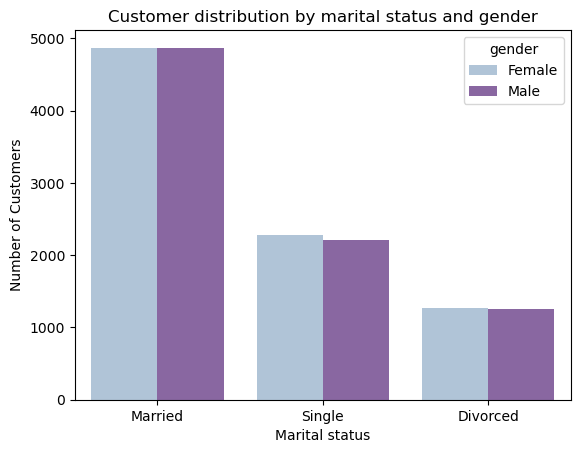

In [129]:
# Plotting with 'seaborn' ('countplot')

sns.countplot(data=df_loyalty, x='marital_status', hue='gender', palette=custom_palette2)
plt.title('Customer distribution by marital status and gender')
plt.ylabel('Number of Customers')
plt.xlabel('Marital status')
plt.show();

### Conclusions:

- The most common marital status category is "Married."

- The category with the fewest customers is "Divorced."

- There are no significant differences between marital status and gender among customers in the "Married" and "Divorced" categories.

-  Fewer single women than single men are represented in this data set.

---

## V. Evaluation of Differences in Flight Reservations by Education Level

This section aims to assess whether there are significant differences in the number of flight reservations based on the customers' level of education.

---

In [130]:
# 1. Data Preparation: Filter the dataset to include only the relevant columns:
# 'Flights Booked' and 'Education'

In [131]:
df_hypothesis = df_complete[['flights_booked', 'education']]
df_hypothesis.head(10)

,flights_booked,education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor
5,0,Bachelor
6,0,Bachelor
7,0,Bachelor
8,6,Bachelor
9,0,Bachelor


In [132]:
# 2. Descriptive Analysis: Group the data by educational level and
# calculate basic descriptive statistics (such as the average and standard deviation) for the number of flights booked for each group

In [133]:
# crear un nuevo DataFrame agrupando con 'groupby()' por Nivel Educativo ('education') y contando cuantos vuelos en total han reservado ('flights_booked') con 'sum()' 

df_group = df_hypothesis.groupby(['education'], as_index=False)['flights_booked'].sum()
df_group

,education,flights_booked
0,Bachelor,1038123
1,College,426398
2,Doctor,74036
3,High School or Below,78993
4,Master,51614


In [134]:
# Explore the metrics of this new DataFrame:

display(df_group.describe().T)

# Note: The data has a high standard deviation
# The mean and median are not close to each other

,count,mean,std,min,25%,50%,75%,max
flights_booked,5.0,333832.8,423284.229004,51614.0,74036.0,78993.0,426398.0,1038123.0


In [135]:
bachelor = df_complete[df_complete['education'] == 'Bachelor']['flights_booked']
bachelor.head()

0    3
3    0
4    0
5    0
6    0
Name: flights_booked, dtype: int64

In [136]:
college = df_complete[df_complete['education'] == 'College']['flights_booked']
college.head()

1     10
2      6
17     0
20     6
21    11
Name: flights_booked, dtype: int64

In [137]:
high_School = df_complete[df_complete['education'] == 'High School or Below']['flights_booked']
high_School.head()

24    0
53    0
69    6
75    3
78    1
Name: flights_booked, dtype: int64

In [138]:
doctor = df_complete[df_complete['education'] == 'Doctor']['flights_booked']
doctor.head()

33    11
51     0
67     0
77     0
80     6
Name: flights_booked, dtype: int64

In [139]:
master = df_complete[df_complete['education'] == 'Master']['flights_booked']
master.head()

14      0
16     11
19      9
34      0
145     0
Name: flights_booked, dtype: int64

In [140]:
# Normality test:
# If > 50 samples: Kolmogorov-Smirnov test
# If < 50 samples: Shapiro test

print(len(bachelor))
print(len(college))
print(len(high_School))
print(len(doctor))
print(len(master))

252567
102260
18915
17731
12287


In [141]:
# 3. Statistical Test: Perform a hypothesis test to determine if there is a significant difference in the number of flights booked among different educational levels

## Hypothesis Statement:

- ### Null hypothesis (H0): Both groups are the same; there are no significant differences in the number of flights booked across different educational levels.

- ### Alternative hypothesis (H1): The groups are significantly different; those with different educational levels do not book the same number of flights.

---

In [142]:
# Define a function to perform the Student's t-test

def hypothesis_test(alfa, *args):
    """ 
    Perform a hypothesis test to compare groups.
    1. First, check if the data is normally distributed using the Shapiro-Wilk or Kolmogorov-Smirnov test.
    2. If the data is normally distributed, use Bartlett's test to test for equal variances. If not, use Levene's test.
    3. If the variances are equal, use Student's t-test; otherwise, use Welch's t-test.
    4. If the data is not normally distributed, use the Mann-Whitney U test (non-parametric alternative).

    Parameters:
    *args: lists or arrays containing the data for each group.

    Returns:
    A dictionary with the results of the normality test, variance test, and hypothesis test.
    """
    
# Check if there are at least two groups
    if len(args) < 2:
        raise ValueError('At least two data sets are required to perform the test.')
    
# Check for normality in each group
    normality = []
    for group in args:
        if len(group) > 50:
            p_value_norm = stats.kstest(group, 'norm').pvalue  # Kolmogorov-Smirnov if n => 50
        else:
            p_value_norm = stats.shapiro(group).pvalue  # Shapiro-Wilk if n <= 50
        normality.append(p_value_norm > 0.05)

    normal_data = all(normality)  # True if all groups are normal

    # Test for equality of variances
    if normal_data:
        p_value_variance = stats.bartlett(*args).pvalue  # Bartlett's test to determine if the data is normally distributed
    else:
        p_value_variance = stats.levene(*args, center='median').pvalue  # Use Levene's test if data is not normally distributed

    equal_variance = p_value_variance > 0.05

    # Apply the appropriate test
    if normal_data:
        if equal_variance:
            p_value = stats.ttest_ind(*args, equal_var=True).pvalue
            test_use = 'Student t-test (equal variances)'
        else:
            p_value = stats.ttest_ind(*args, equal_var=False).pvalue
            test_use = 'Welch t-test (unequal variances)'
    else:
        try: # if there is two groups
            p_value = stats.mannwhitneyu(*args).pvalue
            test_use = 'Mann-Whitney U test (non-parametric test)'
        except: # if there is more than two groups
            p_value = stats.kruskal(*args).pvalue
            test_use = 'Kruskal Wallis'

    # Significance level
    alfa = alfa

    # Results
    result = {
        'Normality Test': normality,
        'Normal Data': normal_data,
        'p-value Variance': p_value_variance,
        'Equal variances': equal_variance,
        'Used test': test_use,
        'p-value': p_value,
        'Conclusion': 'We reject H0 (Significant differences)' if p_value < alfa else 'H0 is not rejected (No significant differences)'
    }

    # Print results more clearly
    print('\n📊 **Hypothesis Test Results** 📊')
    print(f'✅ Normality Test: {"Yes" if normal_data else "No"}')
    print(f'   - Normality by group: {normality}')
    print(f'✅ Variance Test: {"Equals" if equal_variance else "Unequal"} (p = {p_value_variance:.4f})')
    print(f'✅ Test applied: {test_use}')
    print(f' p-value: {p_value:.4f}')
    print(f"🔍 Conclusion: {result['Conclusion']}\n")

    return result

In [144]:
# Use the defined function with the groups separately, in order to compare them

hypothesis_test(0.05, bachelor, college, high_School, doctor, master)


📊 **Hypothesis Test Results** 📊
✅ Normality Test: No
   - Normality by group: [False, False, False, False, False]
✅ Variance Test: Unequal (p = 0.0150)
✅ Test applied: Kruskal Wallis
 p-value: 0.0015
🔍 Conclusion: We reject H0 (Significant differences)



{'Normality Test': [False, False, False, False, False],
 'Normal Data': False,
 'p-value Variance': 0.014969793534581529,
 'Equal variances': False,
 'Used test': 'Kruskal Wallis',
 'p-value': 0.0015225470219889367,
 'Conclusion': 'We reject H0 (Significant differences)'}

In [146]:
# Create a new DataFrame by grouping the data using 'groupby()' based on 'education level' and counting the total number of flights booked ('flights_booked') using 'sum()'
# Sort the results using the 'sort_values()' function in descending order

df_education = (df_hypothesis.groupby('education', as_index=False)['flights_booked'].sum().sort_values('flights_booked', ascending=False))

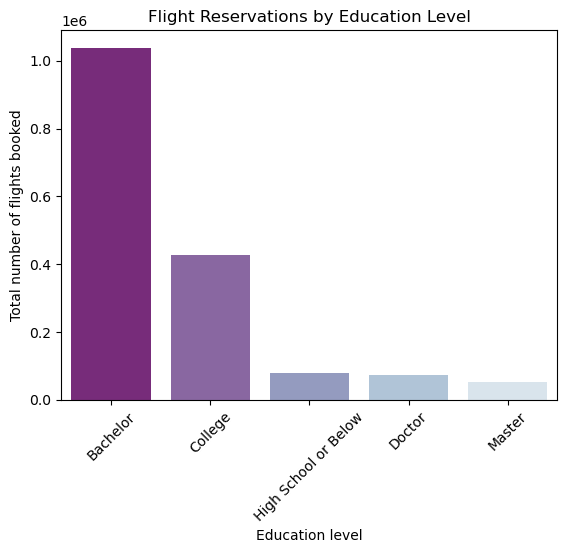

In [147]:
# Plot the groups using 'seaborn' ('barplot') with the previous order

sns.barplot(data=df_education, x='education', y='flights_booked', palette='BuPu_r')
plt.title('Flight Reservations by Education Level')
plt.xlabel('Education level')
plt.ylabel('Total number of flights booked')
plt.xticks(rotation=45)
plt.show();

### Conclusions:

- It can be concluded that customers' level of education influences the number of flights they book.

---